In [1]:
import pandas as pd;
import numpy as np;
from sklearn.model_selection import train_test_split
import tensorflow as tf;
from tensorflow import keras;
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense, BatchNormalization, Dropout
from keras import optimizers


import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
org_train = pd.read_csv("train.csv");
org_test = pd.read_csv("test.csv");

In [3]:
img_conv = [];
for i in org_train.id:
    img = plt.imread('C:/Users/z023209/Deep Learning/Apprael/train/'+str(i)+'.png');
    img_conv.append(img);
train_conv = np.array(img_conv);  

In [4]:
train_conv.shape

(60000, 28, 28, 4)

In [5]:
timg_conv = [];
for i in org_test.id:
    img_t = plt.imread('C:/Users/z023209/Deep Learning/Apprael/test/'+str(i)+'.png');
    timg_conv.append(img_t);
test_conv = np.array(timg_conv);

In [6]:
print(org_train.shape, org_test.shape, train_conv.shape, test_conv.shape)

(60000, 2) (10000, 1) (60000, 28, 28, 4) (10000, 28, 28, 4)


In [7]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = train_conv.reshape((train_conv.shape[0], -1));
X_test = test_conv.reshape((test_conv.shape[0], -1));

In [8]:
print(org_train.shape, org_test.shape, X_train.shape, X_test.shape)

(60000, 2) (10000, 1) (60000, 3136) (10000, 3136)


In [9]:
x_train,x_test,y_train,y_test = train_test_split(X_train,org_train['label'], test_size = 0.3, random_state = 1)

In [10]:
y_train = to_categorical(y_train);
y_test = to_categorical(y_test);
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(42000, 3136) (42000, 10) (18000, 3136) (18000, 10)


In [11]:
x_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

# Basic MLP model
# Naive MLP model without any alterations

In [11]:
model = Sequential()

In [12]:
model.add(Dense(50, input_shape = (3136, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [13]:
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
history = model.fit(x_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 100, verbose = 2)

Train on 29399 samples, validate on 12601 samples
Epoch 1/100
 - 3s - loss: 2.4214 - accuracy: 0.0974 - val_loss: 2.3970 - val_accuracy: 0.1017
Epoch 2/100
 - 2s - loss: 2.3905 - accuracy: 0.0974 - val_loss: 2.3722 - val_accuracy: 0.1017
Epoch 3/100
 - 2s - loss: 2.3682 - accuracy: 0.0974 - val_loss: 2.3542 - val_accuracy: 0.1017
Epoch 4/100
 - 2s - loss: 2.3518 - accuracy: 0.0974 - val_loss: 2.3408 - val_accuracy: 0.1017
Epoch 5/100
 - 2s - loss: 2.3394 - accuracy: 0.0974 - val_loss: 2.3308 - val_accuracy: 0.1017
Epoch 6/100
 - 2s - loss: 2.3301 - accuracy: 0.0974 - val_loss: 2.3233 - val_accuracy: 0.1017
Epoch 7/100
 - 2s - loss: 2.3230 - accuracy: 0.0974 - val_loss: 2.3177 - val_accuracy: 0.1017
Epoch 8/100
 - 2s - loss: 2.3177 - accuracy: 0.0974 - val_loss: 2.3136 - val_accuracy: 0.1017
Epoch 9/100
 - 2s - loss: 2.3138 - accuracy: 0.0974 - val_loss: 2.3105 - val_accuracy: 0.1017
Epoch 10/100
 - 2s - loss: 2.3108 - accuracy: 0.0974 - val_loss: 2.3082 - val_accuracy: 0.1017
Epoch 11/

Epoch 87/100
 - 2s - loss: 2.3016 - accuracy: 0.1024 - val_loss: 2.3019 - val_accuracy: 0.0975
Epoch 88/100
 - 2s - loss: 2.3016 - accuracy: 0.1025 - val_loss: 2.3018 - val_accuracy: 0.0975
Epoch 89/100
 - 2s - loss: 2.3015 - accuracy: 0.1024 - val_loss: 2.3018 - val_accuracy: 0.0975
Epoch 90/100
 - 2s - loss: 2.3015 - accuracy: 0.1025 - val_loss: 2.3018 - val_accuracy: 0.0975
Epoch 91/100
 - 2s - loss: 2.3015 - accuracy: 0.1024 - val_loss: 2.3018 - val_accuracy: 0.0975
Epoch 92/100
 - 2s - loss: 2.3015 - accuracy: 0.1035 - val_loss: 2.3018 - val_accuracy: 0.0975
Epoch 93/100
 - 2s - loss: 2.3015 - accuracy: 0.1025 - val_loss: 2.3018 - val_accuracy: 0.0975
Epoch 94/100
 - 2s - loss: 2.3015 - accuracy: 0.1023 - val_loss: 2.3017 - val_accuracy: 0.0975
Epoch 95/100
 - 2s - loss: 2.3014 - accuracy: 0.1047 - val_loss: 2.3017 - val_accuracy: 0.0975
Epoch 96/100
 - 2s - loss: 2.3014 - accuracy: 0.1024 - val_loss: 2.3017 - val_accuracy: 0.0975
Epoch 97/100
 - 2s - loss: 2.3014 - accuracy: 0.10

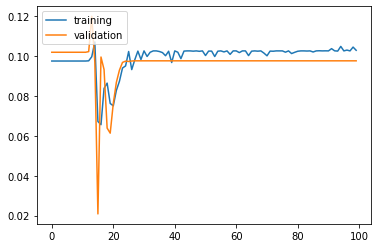

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [16]:
results = model.evaluate(x_test, y_test)

18000/18000 [==============================] - 2s 84us/step


In [17]:
print('Test accuracy: ', results[1])

Test accuracy:  0.09783333539962769


# 1. Weight Initialization

In [18]:
# from now on, create a function to generate (return) models
def mlp_model(initial):
    model = Sequential()
    
    model.add(Dense(50, input_shape = (3136, ), kernel_initializer=initial))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer=initial))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer=initial))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer=initial))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer=initial))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [19]:
model = mlp_model('he_normal')
#model = mlp_model('he_uniform')
history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 100, verbose = 2)

Train on 29399 samples, validate on 12601 samples
Epoch 1/100
 - 6s - loss: 2.4201 - accuracy: 0.1010 - val_loss: 2.3216 - val_accuracy: 0.0996
Epoch 2/100
 - 6s - loss: 2.3098 - accuracy: 0.1013 - val_loss: 2.3020 - val_accuracy: 0.1558
Epoch 3/100
 - 6s - loss: 2.3017 - accuracy: 0.1081 - val_loss: 2.3011 - val_accuracy: 0.1063
Epoch 4/100
 - 6s - loss: 2.3007 - accuracy: 0.1119 - val_loss: 2.3005 - val_accuracy: 0.0914
Epoch 5/100
 - 6s - loss: 2.3001 - accuracy: 0.1182 - val_loss: 2.3000 - val_accuracy: 0.0975
Epoch 6/100
 - 6s - loss: 2.2995 - accuracy: 0.1200 - val_loss: 2.2994 - val_accuracy: 0.1301
Epoch 7/100
 - 6s - loss: 2.2989 - accuracy: 0.1117 - val_loss: 2.2987 - val_accuracy: 0.1257
Epoch 8/100
 - 6s - loss: 2.2982 - accuracy: 0.1273 - val_loss: 2.2981 - val_accuracy: 0.1640
Epoch 9/100
 - 6s - loss: 2.2975 - accuracy: 0.1359 - val_loss: 2.2974 - val_accuracy: 0.0975
Epoch 10/100
 - 6s - loss: 2.2968 - accuracy: 0.1433 - val_loss: 2.2967 - val_accuracy: 0.0975
Epoch 11/

Epoch 87/100
 - 6s - loss: 1.6028 - accuracy: 0.4599 - val_loss: 1.6006 - val_accuracy: 0.4627
Epoch 88/100
 - 6s - loss: 1.5936 - accuracy: 0.4720 - val_loss: 1.5913 - val_accuracy: 0.4489
Epoch 89/100
 - 6s - loss: 1.5843 - accuracy: 0.4596 - val_loss: 1.5818 - val_accuracy: 0.4550
Epoch 90/100
 - 6s - loss: 1.5749 - accuracy: 0.4618 - val_loss: 1.5723 - val_accuracy: 0.4535
Epoch 91/100
 - 6s - loss: 1.5654 - accuracy: 0.4521 - val_loss: 1.5628 - val_accuracy: 0.4776
Epoch 92/100
 - 6s - loss: 1.5557 - accuracy: 0.4702 - val_loss: 1.5530 - val_accuracy: 0.4673
Epoch 93/100
 - 6s - loss: 1.5460 - accuracy: 0.4710 - val_loss: 1.5431 - val_accuracy: 0.4619
Epoch 94/100
 - 6s - loss: 1.5360 - accuracy: 0.4623 - val_loss: 1.5332 - val_accuracy: 0.4722
Epoch 95/100
 - 6s - loss: 1.5261 - accuracy: 0.4708 - val_loss: 1.5231 - val_accuracy: 0.4701
Epoch 96/100
 - 6s - loss: 1.5160 - accuracy: 0.4796 - val_loss: 1.5129 - val_accuracy: 0.4633
Epoch 97/100
 - 6s - loss: 1.5058 - accuracy: 0.46

In [20]:
results = model.evaluate(x_test, y_test)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 2s 93us/step
Test accuracy:  0.4785555601119995


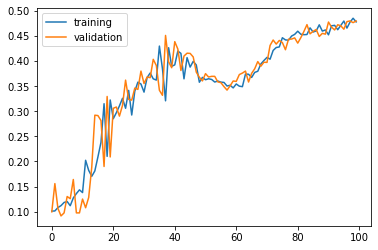

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

# 2. Nonlinearity (Activation function

In [22]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (3136, )))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('elu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [23]:
model = mlp_model()
history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 100, verbose = 2)

Train on 29399 samples, validate on 12601 samples
Epoch 1/100
 - 6s - loss: 1.3651 - accuracy: 0.5867 - val_loss: 0.9405 - val_accuracy: 0.7203
Epoch 2/100
 - 6s - loss: 0.8228 - accuracy: 0.7350 - val_loss: 0.7460 - val_accuracy: 0.7441
Epoch 3/100
 - 6s - loss: 0.6969 - accuracy: 0.7576 - val_loss: 0.6647 - val_accuracy: 0.7666
Epoch 4/100
 - 6s - loss: 0.6347 - accuracy: 0.7756 - val_loss: 0.6154 - val_accuracy: 0.7815
Epoch 5/100
 - 6s - loss: 0.5929 - accuracy: 0.7906 - val_loss: 0.5824 - val_accuracy: 0.7970
Epoch 6/100
 - 6s - loss: 0.5622 - accuracy: 0.7993 - val_loss: 0.5755 - val_accuracy: 0.7887
Epoch 7/100
 - 6s - loss: 0.5395 - accuracy: 0.8085 - val_loss: 0.5320 - val_accuracy: 0.8139
Epoch 8/100
 - 6s - loss: 0.5199 - accuracy: 0.8164 - val_loss: 0.5211 - val_accuracy: 0.8151
Epoch 9/100
 - 6s - loss: 0.5062 - accuracy: 0.8215 - val_loss: 0.5004 - val_accuracy: 0.8245
Epoch 10/100
 - 6s - loss: 0.4930 - accuracy: 0.8259 - val_loss: 0.4930 - val_accuracy: 0.8231
Epoch 11/

Epoch 87/100
 - 3s - loss: 0.3164 - accuracy: 0.8833 - val_loss: 0.3681 - val_accuracy: 0.8687
Epoch 88/100
 - 3s - loss: 0.3157 - accuracy: 0.8848 - val_loss: 0.3704 - val_accuracy: 0.8693
Epoch 89/100
 - 3s - loss: 0.3139 - accuracy: 0.8837 - val_loss: 0.3653 - val_accuracy: 0.8705
Epoch 90/100
 - 4s - loss: 0.3142 - accuracy: 0.8856 - val_loss: 0.3675 - val_accuracy: 0.8676
Epoch 91/100
 - 4s - loss: 0.3132 - accuracy: 0.8842 - val_loss: 0.3730 - val_accuracy: 0.8658
Epoch 92/100
 - 4s - loss: 0.3115 - accuracy: 0.8850 - val_loss: 0.3738 - val_accuracy: 0.8704
Epoch 93/100
 - 4s - loss: 0.3098 - accuracy: 0.8878 - val_loss: 0.3680 - val_accuracy: 0.8699
Epoch 94/100
 - 3s - loss: 0.3089 - accuracy: 0.8874 - val_loss: 0.3763 - val_accuracy: 0.8629
Epoch 95/100
 - 3s - loss: 0.3079 - accuracy: 0.8866 - val_loss: 0.3793 - val_accuracy: 0.8630
Epoch 96/100
 - 3s - loss: 0.3077 - accuracy: 0.8856 - val_loss: 0.3788 - val_accuracy: 0.8666
Epoch 97/100
 - 3s - loss: 0.3069 - accuracy: 0.88

In [24]:
results = model.evaluate(x_test, y_test)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 1s 47us/step
Test accuracy:  0.871999979019165


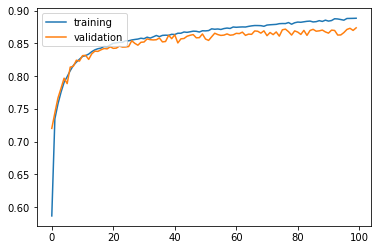

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

# Optimizer

In [26]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (3136, )))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))  
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [27]:
model = mlp_model()
history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 100, verbose = 2)

Train on 29399 samples, validate on 12601 samples
Epoch 1/100
 - 5s - loss: 0.6075 - accuracy: 0.7761 - val_loss: 0.5020 - val_accuracy: 0.8151
Epoch 2/100
 - 4s - loss: 0.4615 - accuracy: 0.8288 - val_loss: 0.4445 - val_accuracy: 0.8389
Epoch 3/100
 - 4s - loss: 0.4201 - accuracy: 0.8439 - val_loss: 0.3955 - val_accuracy: 0.8552
Epoch 4/100
 - 4s - loss: 0.3955 - accuracy: 0.8524 - val_loss: 0.4350 - val_accuracy: 0.8341
Epoch 5/100
 - 4s - loss: 0.3757 - accuracy: 0.8593 - val_loss: 0.3938 - val_accuracy: 0.8579
Epoch 6/100
 - 4s - loss: 0.3583 - accuracy: 0.8636 - val_loss: 0.3805 - val_accuracy: 0.8629
Epoch 7/100
 - 4s - loss: 0.3475 - accuracy: 0.8683 - val_loss: 0.3863 - val_accuracy: 0.8565
Epoch 8/100
 - 4s - loss: 0.3365 - accuracy: 0.8699 - val_loss: 0.3929 - val_accuracy: 0.8597
Epoch 9/100
 - 4s - loss: 0.3275 - accuracy: 0.8766 - val_loss: 0.4104 - val_accuracy: 0.8517
Epoch 10/100
 - 4s - loss: 0.3169 - accuracy: 0.8810 - val_loss: 0.4016 - val_accuracy: 0.8614
Epoch 11/

Epoch 87/100
 - 4s - loss: 0.1241 - accuracy: 0.9513 - val_loss: 0.5365 - val_accuracy: 0.8817
Epoch 88/100
 - 4s - loss: 0.1209 - accuracy: 0.9517 - val_loss: 0.5638 - val_accuracy: 0.8793
Epoch 89/100
 - 4s - loss: 0.1136 - accuracy: 0.9553 - val_loss: 0.5869 - val_accuracy: 0.8780
Epoch 90/100
 - 4s - loss: 0.1284 - accuracy: 0.9514 - val_loss: 0.5822 - val_accuracy: 0.8791
Epoch 91/100
 - 4s - loss: 0.1109 - accuracy: 0.9575 - val_loss: 0.6140 - val_accuracy: 0.8762
Epoch 92/100
 - 4s - loss: 0.1121 - accuracy: 0.9586 - val_loss: 0.5851 - val_accuracy: 0.8779
Epoch 93/100
 - 4s - loss: 0.1144 - accuracy: 0.9559 - val_loss: 0.6447 - val_accuracy: 0.8716
Epoch 94/100
 - 4s - loss: 0.1172 - accuracy: 0.9544 - val_loss: 0.5838 - val_accuracy: 0.8773
Epoch 95/100
 - 5s - loss: 0.1160 - accuracy: 0.9566 - val_loss: 0.5674 - val_accuracy: 0.8771
Epoch 96/100
 - 4s - loss: 0.1061 - accuracy: 0.9598 - val_loss: 0.6149 - val_accuracy: 0.8724
Epoch 97/100
 - 4s - loss: 0.1124 - accuracy: 0.95

In [28]:
results = model.evaluate(x_test, y_test)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 1s 43us/step
Test accuracy:  0.8765555620193481


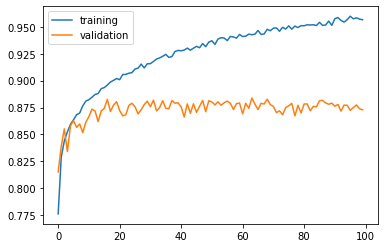

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [37]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (3136, )))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(50))
    model.add(BatchNormalization())                    # Add Batchnorm layer before Activation
    model.add(Activation('elu'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [38]:
model = mlp_model()
history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 100, verbose = 2)

Train on 29399 samples, validate on 12601 samples
Epoch 1/100
 - 17s - loss: 0.5637 - accuracy: 0.8025 - val_loss: 0.4544 - val_accuracy: 0.8393
Epoch 2/100
 - 10s - loss: 0.4379 - accuracy: 0.8429 - val_loss: 0.4029 - val_accuracy: 0.8564
Epoch 3/100
 - 10s - loss: 0.4036 - accuracy: 0.8521 - val_loss: 0.3957 - val_accuracy: 0.8593
Epoch 4/100
 - 10s - loss: 0.3730 - accuracy: 0.8614 - val_loss: 0.3748 - val_accuracy: 0.8656
Epoch 5/100
 - 10s - loss: 0.3565 - accuracy: 0.8692 - val_loss: 0.3981 - val_accuracy: 0.8572
Epoch 6/100
 - 10s - loss: 0.3386 - accuracy: 0.8747 - val_loss: 0.3551 - val_accuracy: 0.8695
Epoch 7/100
 - 10s - loss: 0.3171 - accuracy: 0.8810 - val_loss: 0.3976 - val_accuracy: 0.8598
Epoch 8/100
 - 10s - loss: 0.3104 - accuracy: 0.8844 - val_loss: 0.3749 - val_accuracy: 0.8641
Epoch 9/100
 - 10s - loss: 0.2996 - accuracy: 0.8884 - val_loss: 0.3468 - val_accuracy: 0.8768
Epoch 10/100
 - 11s - loss: 0.2899 - accuracy: 0.8922 - val_loss: 0.3500 - val_accuracy: 0.8752

Epoch 86/100
 - 24s - loss: 0.0916 - accuracy: 0.9663 - val_loss: 0.5143 - val_accuracy: 0.8760
Epoch 87/100
 - 24s - loss: 0.0878 - accuracy: 0.9672 - val_loss: 0.5860 - val_accuracy: 0.8693
Epoch 88/100
 - 24s - loss: 0.0926 - accuracy: 0.9658 - val_loss: 0.5191 - val_accuracy: 0.8744
Epoch 89/100
 - 25s - loss: 0.0877 - accuracy: 0.9678 - val_loss: 0.5399 - val_accuracy: 0.8758
Epoch 90/100
 - 25s - loss: 0.0887 - accuracy: 0.9672 - val_loss: 0.5390 - val_accuracy: 0.8749
Epoch 91/100
 - 25s - loss: 0.0882 - accuracy: 0.9666 - val_loss: 0.5443 - val_accuracy: 0.8767
Epoch 92/100
 - 25s - loss: 0.0870 - accuracy: 0.9674 - val_loss: 0.5478 - val_accuracy: 0.8772
Epoch 93/100
 - 25s - loss: 0.0843 - accuracy: 0.9677 - val_loss: 0.6107 - val_accuracy: 0.8718
Epoch 94/100
 - 25s - loss: 0.0870 - accuracy: 0.9681 - val_loss: 0.6106 - val_accuracy: 0.8676
Epoch 95/100
 - 25s - loss: 0.0850 - accuracy: 0.9679 - val_loss: 0.5957 - val_accuracy: 0.8682
Epoch 96/100
 - 25s - loss: 0.0826 - acc

In [39]:
results = model.evaluate(x_test, y_test)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 18s 999us/step
Test accuracy:  0.8765555620193481


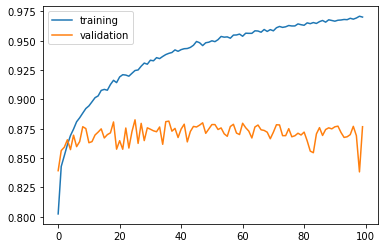

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

# DropOut

In [32]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (3136, )))
    model.add(Activation('elu'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('elu'))
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('elu'))    
    model.add(Dropout(0.2))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [34]:
model = mlp_model()
history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 100, verbose = 2)

Train on 29399 samples, validate on 12601 samples
Epoch 1/100
 - 8s - loss: 0.8539 - accuracy: 0.6888 - val_loss: 0.5239 - val_accuracy: 0.8079
Epoch 2/100
 - 6s - loss: 0.6218 - accuracy: 0.7791 - val_loss: 0.4631 - val_accuracy: 0.8326
Epoch 3/100
 - 6s - loss: 0.5670 - accuracy: 0.7983 - val_loss: 0.4572 - val_accuracy: 0.8368
Epoch 4/100
 - 6s - loss: 0.5325 - accuracy: 0.8136 - val_loss: 0.4371 - val_accuracy: 0.8396
Epoch 5/100
 - 6s - loss: 0.5096 - accuracy: 0.8196 - val_loss: 0.4375 - val_accuracy: 0.8375
Epoch 6/100
 - 6s - loss: 0.4952 - accuracy: 0.8247 - val_loss: 0.4362 - val_accuracy: 0.8400
Epoch 7/100
 - 6s - loss: 0.4841 - accuracy: 0.8288 - val_loss: 0.4099 - val_accuracy: 0.8514
Epoch 8/100
 - 6s - loss: 0.4738 - accuracy: 0.8314 - val_loss: 0.4165 - val_accuracy: 0.8500
Epoch 9/100
 - 6s - loss: 0.4601 - accuracy: 0.8380 - val_loss: 0.4089 - val_accuracy: 0.8510
Epoch 10/100
 - 6s - loss: 0.4585 - accuracy: 0.8378 - val_loss: 0.4215 - val_accuracy: 0.8479
Epoch 11/

Epoch 87/100
 - 6s - loss: 0.3317 - accuracy: 0.8793 - val_loss: 0.3623 - val_accuracy: 0.8742
Epoch 88/100
 - 6s - loss: 0.3293 - accuracy: 0.8802 - val_loss: 0.3836 - val_accuracy: 0.8703
Epoch 89/100
 - 6s - loss: 0.3257 - accuracy: 0.8826 - val_loss: 0.3746 - val_accuracy: 0.8794
Epoch 90/100
 - 6s - loss: 0.3206 - accuracy: 0.8847 - val_loss: 0.3669 - val_accuracy: 0.8759
Epoch 91/100
 - 6s - loss: 0.3278 - accuracy: 0.8828 - val_loss: 0.3696 - val_accuracy: 0.8755
Epoch 92/100
 - 6s - loss: 0.3253 - accuracy: 0.8814 - val_loss: 0.3760 - val_accuracy: 0.8664
Epoch 93/100
 - 6s - loss: 0.3209 - accuracy: 0.8829 - val_loss: 0.3751 - val_accuracy: 0.8745
Epoch 94/100
 - 6s - loss: 0.3176 - accuracy: 0.8846 - val_loss: 0.3743 - val_accuracy: 0.8754
Epoch 95/100
 - 6s - loss: 0.3223 - accuracy: 0.8828 - val_loss: 0.3888 - val_accuracy: 0.8750
Epoch 96/100
 - 6s - loss: 0.3166 - accuracy: 0.8849 - val_loss: 0.3678 - val_accuracy: 0.8701
Epoch 97/100
 - 6s - loss: 0.3201 - accuracy: 0.88

In [35]:
results = model.evaluate(x_test, y_test)
print('Test accuracy: ', results[1])

18000/18000 [==============================] - 2s 116us/step
Test accuracy:  0.8700555562973022


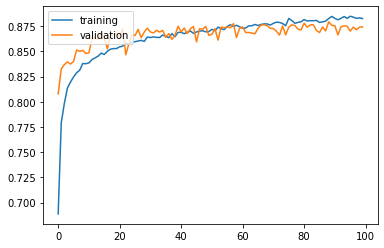

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()